In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
def get_data (path):
    data = pd.read_csv(path)
    return data 

def price_difference(mean1, mean2):
    difference = round(((mean1 - mean2)/mean2)*100,2)
    return difference

def data_statistics(data):
    num_attributes = data.select_dtypes(include=['int64', 'float64'])
    avg = pd.DataFrame(num_attributes.apply(np.mean))
    median = pd.DataFrame(num_attributes.apply(np.median))
    std = pd.DataFrame(num_attributes.apply(np.std))
    max_ = pd.DataFrame(num_attributes.apply(np.max))
    min_ = pd.DataFrame(num_attributes.apply(np.min))
    data_statistics = pd.concat([avg, median, std, max_, min_], axis=1).reset_index()
    data_statistics.columns = ['attributes', 'avarage', 'median', 'std', 'max', 'min']
    return data_statistics

def data_cleaning(data):
    data = data.loc[data['bedrooms']!=33] #cleaning row with 33 bedrooms.It was considered a misswritten error.
    return data

In [4]:
path = 'kc_house_data.csv'
data = get_data(path)

In [5]:
data_statistics(data)

,attributes,avarage,median,std,max,min
0,id,4580301520.86,3904930410.00,2876499023.43,9900000190.00,1000102.00
1,price,540088.14,450000.00,367118.70,7700000.00,75000.00
2,bedrooms,3.37,3.00,0.93,33.00,0.00
3,bathrooms,2.11,2.25,0.77,8.00,0.00
4,sqft_living,2079.90,1910.00,918.42,13540.00,290.00
5,sqft_lot,15106.97,7618.00,41419.55,1651359.00,520.00
6,floors,1.49,1.50,0.54,3.50,1.00
7,waterfront,0.01,0.00,0.09,1.00,0.00
8,view,0.23,0.00,0.77,4.00,0.00
9,condition,3.41,3.00,0.65,5.00,1.00


In [6]:
data_cleaning(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


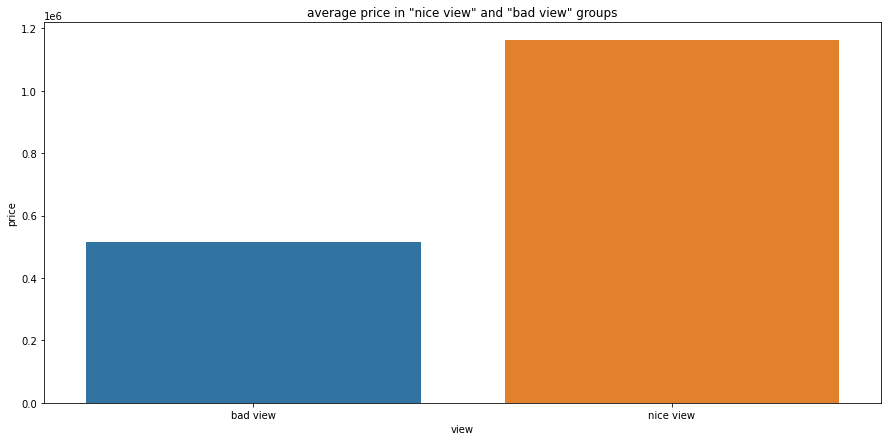

The price difference between groups is: 125.34%


In [7]:
#converting numbers into classification 
data['view'] = data['view'].apply(lambda x: 'nice view' if x>=3 else 'bad view')

#creating 2 groups - nice vew, bad view
view_groups = data[['view', 'price']].groupby('view').mean().reset_index()

#price difference between groups
mean1_nice_view = data.loc[data['view'] == 'nice view', 'price'].mean()
mean2_bad_view = data.loc[data['view'] == 'bad view', 'price'].mean()

#plot
fig_size = (15, 7)
fig = plt.subplots(figsize=fig_size)
sns.barplot(x = 'view', y ='price', data = view_groups)
plt.title ('average price in "nice view" and "bad view" groups')
plt.show()
print(f'The price difference between groups is: {price_difference(mean1_nice_view, mean2_bad_view)}%')

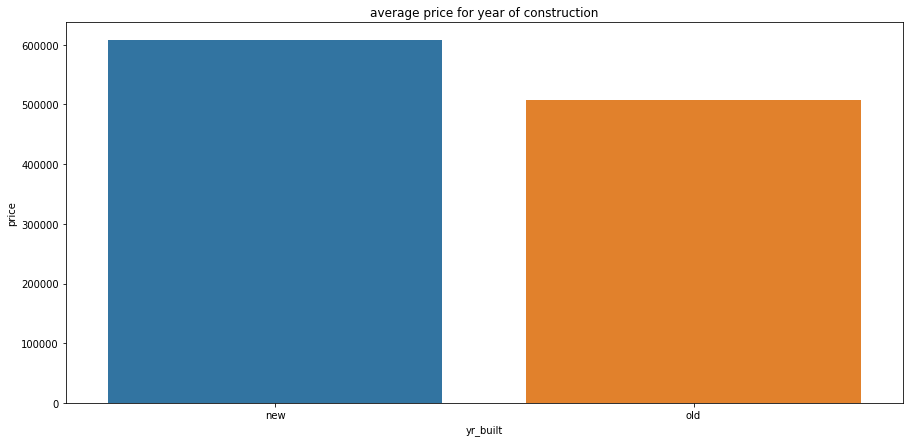

The price difference between groups is 19.51%


In [8]:
#converting numbers into classification
data['yr_built'] = data['yr_built'].apply(lambda x: 'new' if x>=1990 else 'old')

#creating 2 groups - new: built after 1990, old:buit before 1990
yr_built_groups = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()

#price difference between groups
mean1_new = data.loc[data['yr_built'] == 'new', 'price'].mean()
mean2_old = data.loc[data['yr_built'] == 'old', 'price'].mean()

#plot
fig_size = (15, 7)
fig = plt.subplots(figsize=fig_size)
sns.barplot(x = 'yr_built', y ='price', data = yr_built_groups)
plt.title ('average price for year of construction')
plt.show()
print(f'The price difference between groups is {price_difference(mean1_new, mean2_old)}%')

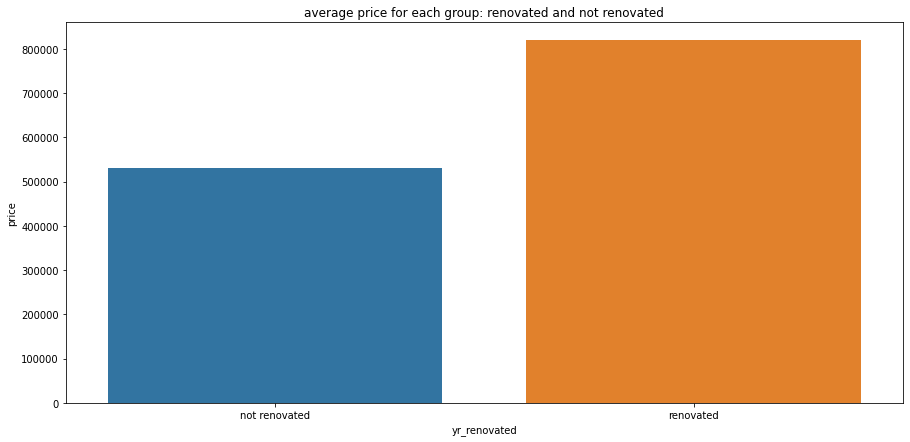

The price difference between groups is 53.99%


In [9]:
#converting numbers into classification
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: 'renovated' if x>=1990 else 'not renovated')

#creating 2 groups - renovated: renovated after 1990, not renovated:not renovated after 1990
yr_renovated_groups = data[['yr_renovated', 'price']].groupby('yr_renovated').mean().reset_index()

#price difference between groups
mean1_renovated = data.loc[data['yr_renovated'] == 'renovated', 'price']. mean()
mean2_not_renovated = data.loc[data['yr_renovated'] == 'not renovated', 'price']. mean()

#plot
fig_size = (15, 7)
fig = plt.subplots(figsize=fig_size)
sns.barplot(x = 'yr_renovated', y ='price', data = yr_renovated_groups)
plt.title ('average price for each group: renovated and not renovated')
plt.show()

print(f'The price difference between groups is {price_difference(mean1_renovated, mean2_not_renovated)}%')

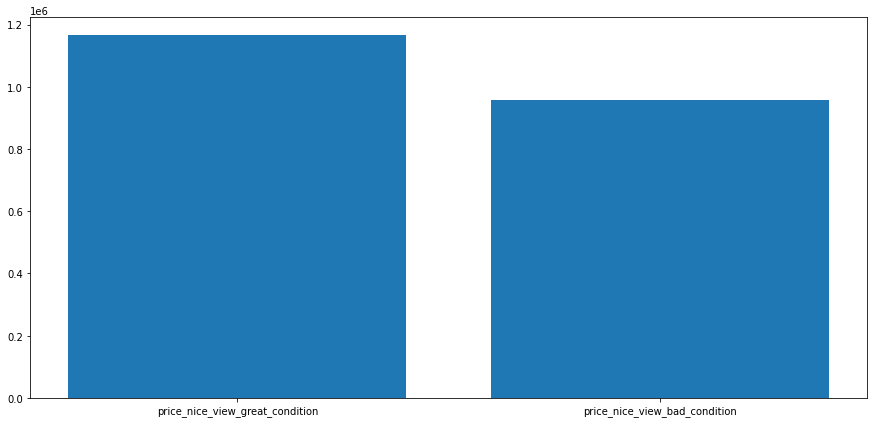

The price difference between groups is 21.46%


In [10]:
#price difference between groups
price_nice_view_great_condition = data.loc[(data['condition']>4) & (data['view'] == 'nice view')  & ((data['yr_renovated'] == 'renovated')|(data['yr_built']=='new')), 'price'].mean()
price_nice_view_bad_condition = data.loc[(data['condition']<=4) & (data['view']=='nice view') & (data['yr_built'] == 'old') & (data['yr_renovated'] == 'not renovated'),'price'].mean()


#plot
df1 = {'price_nice_view_great_condition': price_nice_view_great_condition ,'price_nice_view_bad_condition': price_nice_view_bad_condition}
names = list(df1.keys())
values = list(df1.values())
fig_size = (15, 7)
fig = plt.subplots(figsize=fig_size)
plt.bar(range(len(df1)), values, tick_label=names)
plt.show()

print(f'The price difference between groups is {price_difference(price_nice_view_great_condition, price_nice_view_bad_condition)}%')


In [11]:
#add new feature
data['status'] = '?'

#identifying houses with great condition and prices below median. 
zip_code_bedrooms_groups = data[['price','zipcode','bedrooms']].groupby(['zipcode','bedrooms']).median().reset_index()
df1 = pd.merge(data, zip_code_bedrooms_groups, on = ['zipcode','bedrooms'], how ='inner')

#rename columns
df1 = df1.rename(columns={'price_x' : 'price'})
df1 = df1.rename(columns={'price_y' : 'price_median'})
df1['price_difference'] = df1['price'] - df1['price_median']

#populate status column
df1.loc[(df1['price_difference']<0) & (df1['condition'] > 4), 'status'] = 'buy'
df1.loc[(df1['price_difference']<0) & (df1['condition'] <= 4), 'status'] = 'not buy' 
df1.loc[df1['price_difference']>=0, 'status'] = 'not buy'

#dataframe houses_to_buy_group1
houses_to_buy_group1 = df1.loc[df1['status'] == 'buy', ['id','zipcode', 'bedrooms','condition','view','price','price_median','status']]

#add new features
houses_to_buy_group1['sale_price'] = houses_to_buy_group1['price_median']
houses_to_buy_group1['profit'] = houses_to_buy_group1['sale_price'] - houses_to_buy_group1['price']

number_of_houses_1 = houses_to_buy_group1['id'].count()
average_price_houses_1 = houses_to_buy_group1['price'].mean()
average_sale_price_houses_1 = houses_to_buy_group1['sale_price'].mean()
total_profit_houses_1 = round(houses_to_buy_group1['profit'].sum(),2)

houses_to_buy_group1.head()

,id,zipcode,bedrooms,condition,view,price,price_median,status,sale_price,profit
8,3352402236,98178,3,5,bad view,252500.00,260500.00,buy,260500.00,8000.00
27,7129300420,98178,3,5,bad view,258000.00,260500.00,buy,260500.00,2500.00
32,1180008315,98178,3,5,bad view,212000.00,260500.00,buy,260500.00,48500.00
67,3348401622,98178,3,5,bad view,223000.00,260500.00,buy,260500.00,37500.00
86,4060000290,98178,3,5,bad view,253000.00,260500.00,buy,260500.00,7500.00


In [12]:
#data conclusion - group 1
print('The sale price is the median price from each subgroup, that is composed by houses with the same number of bedrooms and placed in the same region')
print(f'The number of houses in this group is {number_of_houses_1}')
print(f'The total profit from the sales of theses houses is ${total_profit_houses_1}')

The sale price is the median price from each subgroup, that is composed by houses with the same number of bedrooms and placed in the same region
The number of houses in this group is 752
The total profit from the sales of theses houses is $64012756.0


In [13]:
#filtering data with attributes from group 2
nice_view_bad_condition = data.loc[(data['view']=='nice view') & (data['yr_built'] == 'old') & (data['yr_renovated'] == 'not renovated') & (data['condition']<=4)][['id','view','condition','price']]

#adding new features
nice_view_bad_condition['renovate_price'] = nice_view_bad_condition['price']*0.1
nice_view_bad_condition['sale price'] = nice_view_bad_condition['price']*1.21
nice_view_bad_condition['profit'] = nice_view_bad_condition['sale price'] - nice_view_bad_condition['renovate_price'] - nice_view_bad_condition['price']

number_of_houses_2 = nice_view_bad_condition['id'].count()
average_price_houses_2 = nice_view_bad_condition['price'].mean()
average_sale_price_houses_2 = nice_view_bad_condition['sale price'].mean()
average_renovation_price = nice_view_bad_condition['renovate_price'].mean()
total_profit_houses_2 = round(nice_view_bad_condition['profit'].sum(),2)

nice_view_bad_condition

,id,view,condition,price,renovate_price,sale price,profit
15,9297300055,nice view,3,650000.00,65000.00,786500.00,71500.00
21,2524049179,nice view,3,2000000.00,200000.00,2420000.00,220000.00
58,7922800400,nice view,4,951000.00,95100.00,1150710.00,104610.00
60,1516000055,nice view,4,650000.00,65000.00,786500.00,71500.00
218,1250202145,nice view,3,1072000.00,107200.00,1297120.00,117920.00
...,...,...,...,...,...,...,...
19357,3585300194,nice view,3,1400000.00,140000.00,1694000.00,154000.00
19468,3271800870,nice view,4,1225000.00,122500.00,1482250.00,134750.00
19558,6169901095,nice view,3,900000.00,90000.00,1089000.00,99000.00
19613,7525950110,nice view,3,1200000.00,120000.00,1452000.00,132000.00


In [14]:
#data conclusion - group 2
print('The sale price is the median price from each subgroup, that is composed by houses with the same number of bedrooms and placed in the same region.')
print('An amount of money of 10% of the purchase price of the houses was destinated to renovate the houses. ')
print(f'The number of houses to be bought in this group is {number_of_houses_2}.')
print(f'The total profit from the sales of theses houses is ${total_profit_houses_2}.')


The sale price is the median price from each subgroup, that is composed by houses with the same number of bedrooms and placed in the same region.
An amount of money of 10% of the purchase price of the houses was destinated to renovate the houses. 
The number of houses to be bought in this group is 445.
The total profit from the sales of theses houses is $46951315.73.


In [15]:
total = total_profit_houses_1 + total_profit_houses_2
table = {'number of houses': [number_of_houses_1, number_of_houses_2, ''], 'average price':[average_price_houses_1, average_price_houses_2, ''], 'average sale price':[average_sale_price_houses_1, average_sale_price_houses_2, ''],'renovation cost':[0,average_renovation_price,''], 'total profit': [total_profit_houses_1, total_profit_houses_2,total]}

In [16]:
pd.DataFrame(table, index=['Houses Group 1', 'Houses Group 2', 'Total Profit'])

,number of houses,average price,average sale price,renovation cost,total profit
Houses Group 1,752,426594.61,511717.95,0,64012756.00
Houses Group 2,445,959168.86,1160594.32,95916.89,46951315.73
Total Profit,,,,,110964071.73
